# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Our main business objectives is as follows:
We want to identify what factors make a car more or less expensive to present recommendations on what consumers value in a car to our client (a used car dealership).

From a data perspective, we will be analysing the data to see which variables or key features of a car are the most potent predictors of the price of a car (our target variable).  

This will be done by both general statistical analysis as well as creating models that examine the relationship between these features and the final price of the car.  The process of data analysis and modelling will identify which features are the greatest predictors (both positive and negative) of car price.   

Ultimately, we will also pick the best performing model which most accurately predicts the price of each car based on the dataset provided.  

These results and model will be presented to the client so that they can review and adjust their strategy for pricing their current and future inventory in line with customer expectations.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

The experimentation is broadly outlined as followed:
1. Clean the data to remove missing or nonsensical values.<br>
&nbsp;

2. Preprocess the data by encoding non-numerical data where possible, and  consider transforming the data through methods such as standardization, normalization or applying a log transformation.  This helps with ensuring that the data more closely aligns with underlying mathematical assumptions in some of the models, and thus giving them a greater chance of success.  <br>
&nbsp;

3. Review the data, and plot graphs to highlight statistical properties such as correlations and distributions.  This high level investigation will help hone in on obvious relationships that should be explored.  Update step 2 if needed.<br>
&nbsp;

4. Train multiple models with iterations.  Use  cross validation methods to split the data into training and testing sets, and perform multiple iterations in order to select the optimum hyper-parameters for performance for each model type. Cross validation is the process of training and testing the model on different subsets of data, to review how well it performs on new unseen data.<br>
&nbsp;
5. Evaluate the best performing model.  In this study, the best performer will yield the highest accuracy in prediction after undergoing cross validation.  This means that the model is more likely to make accurate predictions (ie. generalize well) on new data.  A common metric for an accurate model is the one with the lowest mean square error (MSE), but other accuracy metrics can and should be selected depending on the models used.  <br>
&nbsp;


## Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

First, I import several Python libraries and tools which will be used throughout the analysis.

In [1]:
from random import shuffle, seed
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, RobustScaler
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, FunctionTransformer
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer, TransformedTargetRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import LeavePOut, cross_validate, KFold, StratifiedKFold
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")

from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Markdown, display

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import time

Next, the data is loaded.  

In [2]:
df = pd.read_csv('data/vehicles.csv')

To get briefly acquainted with the contents of the data, we review the general information and first few rows of data below: 

In [3]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### 1) Data Cleaning

The two immediate takeaways from this data scrub is that:
1. There are many variables missing a significant amount of data
2. Most of the data is non-numerical, and instead 'object' datatype

I will take the following steps to clean up the data

#### i) Remove Duplicates 

In [5]:
#First, make a copy of the dataset so the original can be maintained
df_clean = df.copy()

In [6]:
#Check for duplicates
duplicate_count = df.duplicated().sum()
duplicate_count

0

There are no duplicates across the entire dataset.
Let's take a look at duplicate VINs specifically since this is supposed to be a unique identifier for a car

In [7]:
#Check for duplicates
duplicate_count = df.duplicated(subset=['VIN']).sum()
duplicate_count

308633

It appears there are a significant amount of duplicated VIN entries.  Let's check how many unique VINs there are:

In [8]:
unique_VINs_clean = df_clean['VIN'].nunique() 
unique_VINs_clean

118246

In [9]:
df_clean['VIN'].value_counts() 

VIN
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
1GCEK19J78Z219711      1
JA4AT3AW1AZ006543      1
4T1BF28B61U153724      1
JTHCF5C25A5041393      1
SAJGX2749VCOO8376      1
Name: count, Length: 118246, dtype: int64

To investigate why there are so many duplicate VINs and if we should be deleting them, let's deep dive into the most common one:

In [10]:
MostCommonVIN = df.query('VIN=="1FMJU1JT1HEA52352"')

The code below is searching for the unique values for each column of the dataset specific to the most common VIN:

In [11]:
#List all of the unique values per column

#Step 1: Create a list of column names and convert to a dataframe
col_names = pd.DataFrame(df_clean.columns.tolist())

#Step 2: List unique values for each column and list alongside the column name

for i in range (0,18):

    unique_values = MostCommonVIN.iloc[:,i].unique()
    print_unique_values = pd.DataFrame(unique_values, columns = col_names.iloc[i])
    
    print(pd.DataFrame(print_unique_values),'\n\n')
    

0            id
0    7311818189
1    7311865995
2    7311801032
3    7311915565
4    7311823034
..          ...
256  7311842926
257  7311784162
258  7311832579
259  7311967545
260  7311770039

[261 rows x 1 columns] 


1                      region
0                      auburn
1                  birmingham
2                      dothan
3    florence / muscle shoals
4            gadsden-anniston
..                        ...
248                   madison
249                 milwaukee
250                 sheboygan
251                    wausau
252                   wyoming

[253 rows x 1 columns] 


2  price
0  29590 


3    year
0  2017.0 


4 manufacturer
0         ford 


5                 model
0  expedition xlt sport 


6 condition
0      good 


7    cylinders
0  6 cylinders 


8 fuel
0  gas 


9  odometer
0   70760.0 


10 title_status
0         clean 


11 transmission
0         other 


12                VIN
0   1FMJU1JT1HEA52352 


13 drive
0    4wd 


14 size
0   NaN 


15 ty

It looks like the only values that change are state.  Let's confirm this logic with the 2nd most common VIN:

In [12]:
MostCommonVIN2 = df.query('VIN=="3C6JR6DT3KG560649"')

In [13]:
#List all of the unique values per column

#Step 1: Create a list of column names and convert to a dataframe
col_names = pd.DataFrame(df_clean.columns.tolist())

#Step 2: List unique values for each column and list alongside the column name

for i in range (0,18):

    unique_values = MostCommonVIN2.iloc[:,i].unique()
    print_unique_values = pd.DataFrame(unique_values, columns = col_names.iloc[i])
    
    print(pd.DataFrame(print_unique_values),'\n\n')
    

0            id
0    7313337060
1    7313375333
2    7313325127
3    7313336901
4    7313325231
..          ...
230  7313349205
231  7313251637
232  7313343381
233  7311961016
234  7313235450

[235 rows x 1 columns] 


1                      region
0                      auburn
1                  birmingham
2                      dothan
3    florence / muscle shoals
4            gadsden-anniston
..                        ...
227                   madison
228                 milwaukee
229                 sheboygan
230                    wausau
231                   wyoming

[232 rows x 1 columns] 


2  price
0  25990 


3    year
0  2019.0 


4 manufacturer
0          ram 


5                     model
0  1500 classic regular cab 


6 condition
0      good 


7    cylinders
0  8 cylinders 


8 fuel
0  gas 


9  odometer
0   12302.0 


10 title_status
0         clean 


11 transmission
0         other 


12                VIN
0   3C6JR6DT3KG560649 


13 drive
0    NaN 


14 size
0   NaN 

The top 2 most repeated VINs have exactly the same unique data and price value in all categories except for location (being region & state).  This indicates the same car being posted in multiple locations to broaden its marketplace reach.  As such I'll remove all VIN duplicates where only the location is changing between each entry. 

In [14]:
#Create list of all car features EXCEPT location and ID

In [15]:
subset = ['price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color']

In [16]:
#Calculating the number of entries with duplicates of all the above values
duplicated_VINs = df.duplicated(subset).sum()
duplicated_VINs

178138

There are 178,138 duplicated entries for VINs if we ignore state and location.  We will delete these, as they will skew the data incorrectly towards the cars with repeated VINs.

In [17]:
df_clean = df_clean.drop_duplicates(subset)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248742 entries, 0 to 426873
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            248742 non-null  int64  
 1   region        248742 non-null  object 
 2   price         248742 non-null  int64  
 3   year          248045 non-null  float64
 4   manufacturer  237862 non-null  object 
 5   model         245043 non-null  object 
 6   condition     149519 non-null  object 
 7   cylinders     159123 non-null  object 
 8   fuel          246984 non-null  object 
 9   odometer      246076 non-null  float64
 10  title_status  244453 non-null  object 
 11  transmission  247331 non-null  object 
 12  VIN           126616 non-null  object 
 13  drive         177881 non-null  object 
 14  size          87760 non-null   object 
 15  type          185909 non-null  object 
 16  paint_color   173730 non-null  object 
 17  state         248742 non-null  object 
dtypes: float6

In [18]:
#Calculate the percentage of rows removed
original_rows = len(df)
df_clean_rows = len(df_clean)
df_clean_rows / original_rows * 100

58.26977136431785

We have dropped a significant amount of data by removing duplicate vins, only 58.3% of the original dataset remains.  However this now will not be skewed towards the cars with repeated entries.

#### ii) Remove nonsensical data

During the data cleaning, I noticed some nonsensical VINs.  VINs should have letters and numbers.  Thus we search for vins without numbers and remove them:

In [19]:
#Create a boolean mask to search for VINs without letters:
letter_mask =~df_clean['VIN'].astype(str).str.contains('[a-zA-Z]')

In [20]:
#Count how many VINs without numbers exist:
pd.DataFrame(df_clean['VIN'][letter_mask]).count()

VIN    306
dtype: int64

In [21]:
#Remove the VINs without numbers, apply this change to the entire dataframe:
df_clean = df_clean[~letter_mask]

#### iii) Drop unnecessary columns

Since VIN and ID are now unique identifiers, we will drop these 2 columns.  We will also remove 'region' and 'model', as they contain almost exclusively unique values that will add too much complexity to our models without further aggregation.

In [22]:
df_clean = df_clean.drop(columns=['id','VIN', 'region','model'])

After removing the 306 nonsensical vins, and dropping the ID and VIN column overall, we are left with the following data:

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248436 entries, 0 to 426873
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         248436 non-null  int64  
 1   year          247748 non-null  float64
 2   manufacturer  237593 non-null  object 
 3   condition     149367 non-null  object 
 4   cylinders     158953 non-null  object 
 5   fuel          246725 non-null  object 
 6   odometer      245774 non-null  float64
 7   title_status  244189 non-null  object 
 8   transmission  247070 non-null  object 
 9   drive         177736 non-null  object 
 10  size          87653 non-null   object 
 11  type          185762 non-null  object 
 12  paint_color   173573 non-null  object 
 13  state         248436 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 28.4+ MB


#### iv) Remove outliers

Let's inspect the range of data in the 3 numeric columns, to see if there are any outliers that need to be transformed or removed.

In [24]:
pd.set_option('display.float_format', '{:.0f}'.format)

custom_percentiles = [0.02, 0.1, 0.25, 0.5, 0.75, 0.99]
df_clean.describe(percentiles = custom_percentiles)

,price,year,odometer
count,248436,247748,245774
mean,113323,2009,112396
std,15968656,11,250842
min,0,1900,0
2%,0,1971,250
10%,800,2001,21245
25%,4900,2006,51807
50%,9999,2012,99739
75%,19960,2016,145600
99%,66500,2020,300000


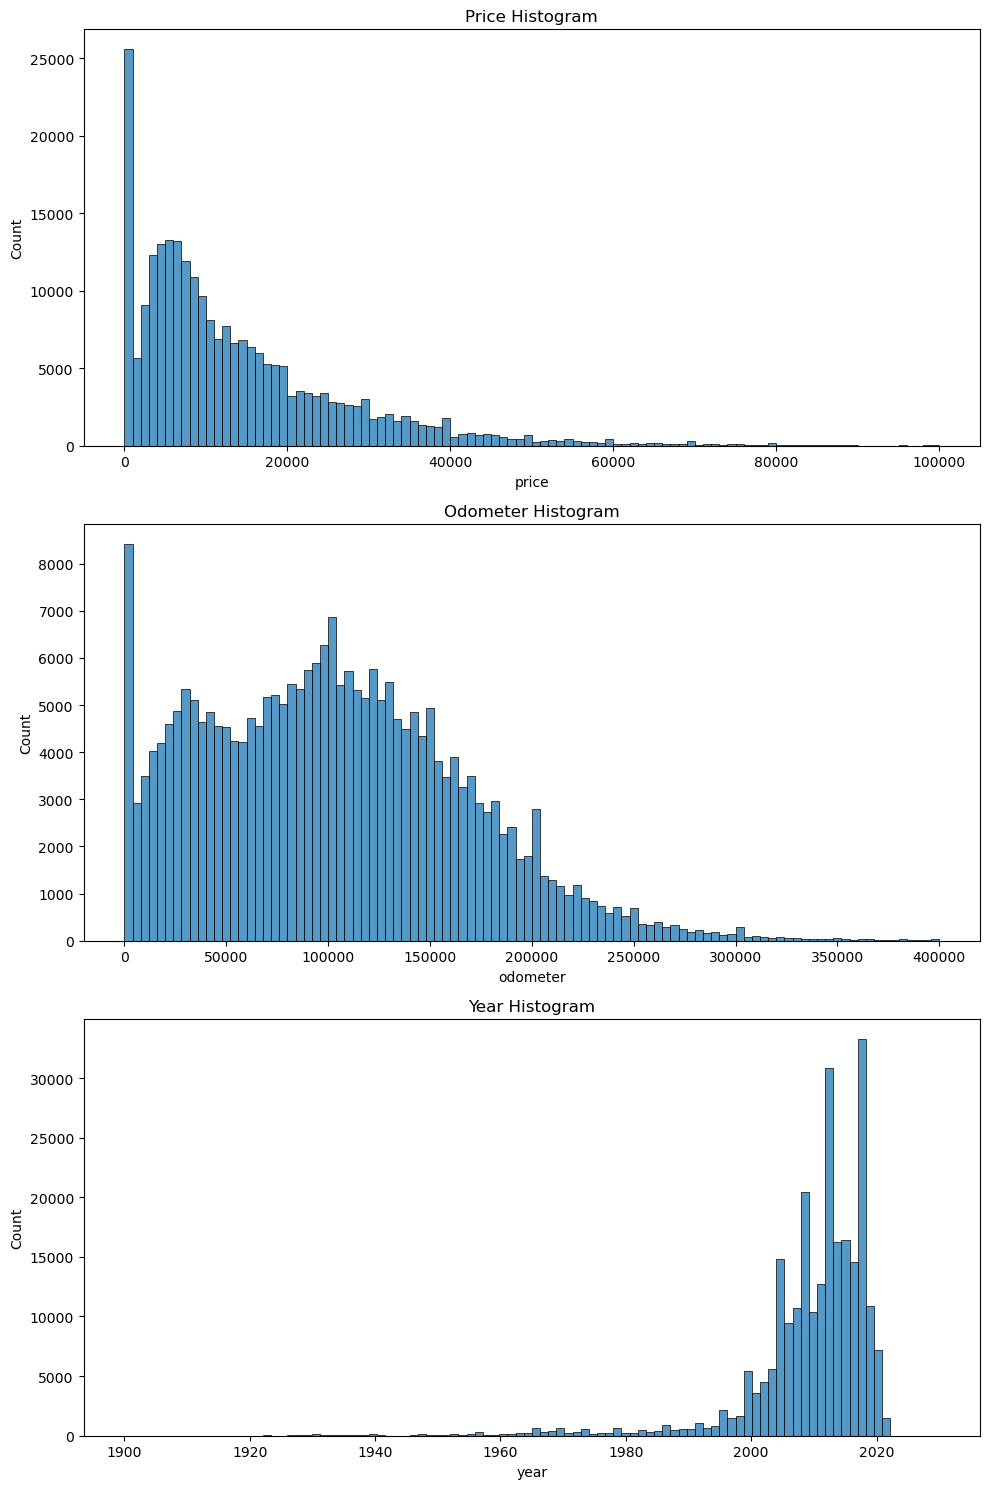

In [25]:
# Create a figure with 3 subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for Price
sns.histplot(data = df_clean,  x= 'price', bins = 100, binrange =(0,100000), ax = axes[0])
axes[0].set_title('Price Histogram')

# Histogram for Odometer
sns.histplot(data = df_clean,  x= 'odometer', bins = 100, binrange =(0,400000), ax = axes[1])
axes[1].set_title('Odometer Histogram')

# Histogram for Year
sns.histplot(data = df_clean,  x= 'year', bins = 100, binrange =(1900,2030), ax = axes[2])
axes[2].set_title('Year Histogram')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

From the above description and histograms, we can see that price and odometer are skewed to the left, and also have some significant upper outliers that don't make any sense (>3 billion USD, and 1,000,000 miles).  We will remove values above the 99% percentile.

For the lower outliers, we will remove below the 10% percentile for price, and for year and odometer, below the 2% percentile.  It is unlikely that anything exists for sale with these values that can be used as accurate data for a model(< 800 USD, car from before 1970, and odometer <250 miles).

In [26]:
# Calculate percentile values for 'price'
price_lower_bound = df_clean['price'].quantile(0.10)
price_upper_bound = df_clean['price'].quantile(0.99)

# Calculate percentile values for 'year'
year_lower_bound = df_clean['year'].quantile(0.02)

# Calculate percentile values for 'odometer'
odometer_lower_bound = df_clean['odometer'].quantile(0.02)
odometer_upper_bound = df_clean['odometer'].quantile(0.99)

# Filter the DataFrame based on these percentile values
df_clean = df_clean[
    (df_clean['price'] >= price_lower_bound) & (df_clean['price'] <= price_upper_bound) &
    (df_clean['year'] >= year_lower_bound) &
    (df_clean['odometer'] >= odometer_lower_bound) & (df_clean['odometer'] <= odometer_upper_bound)]

In [27]:
df_clean.describe(percentiles = custom_percentiles)

,price,year,odometer
count,210074,210074,210074
mean,15191,2010,108035
std,12010,8,60653
min,800,1971,250
2%,1600,1987,7757
10%,3600,2002,28155
25%,6152,2006,61000
50%,11566,2012,105000
75%,20699,2016,149219
99%,54999,2020,261485


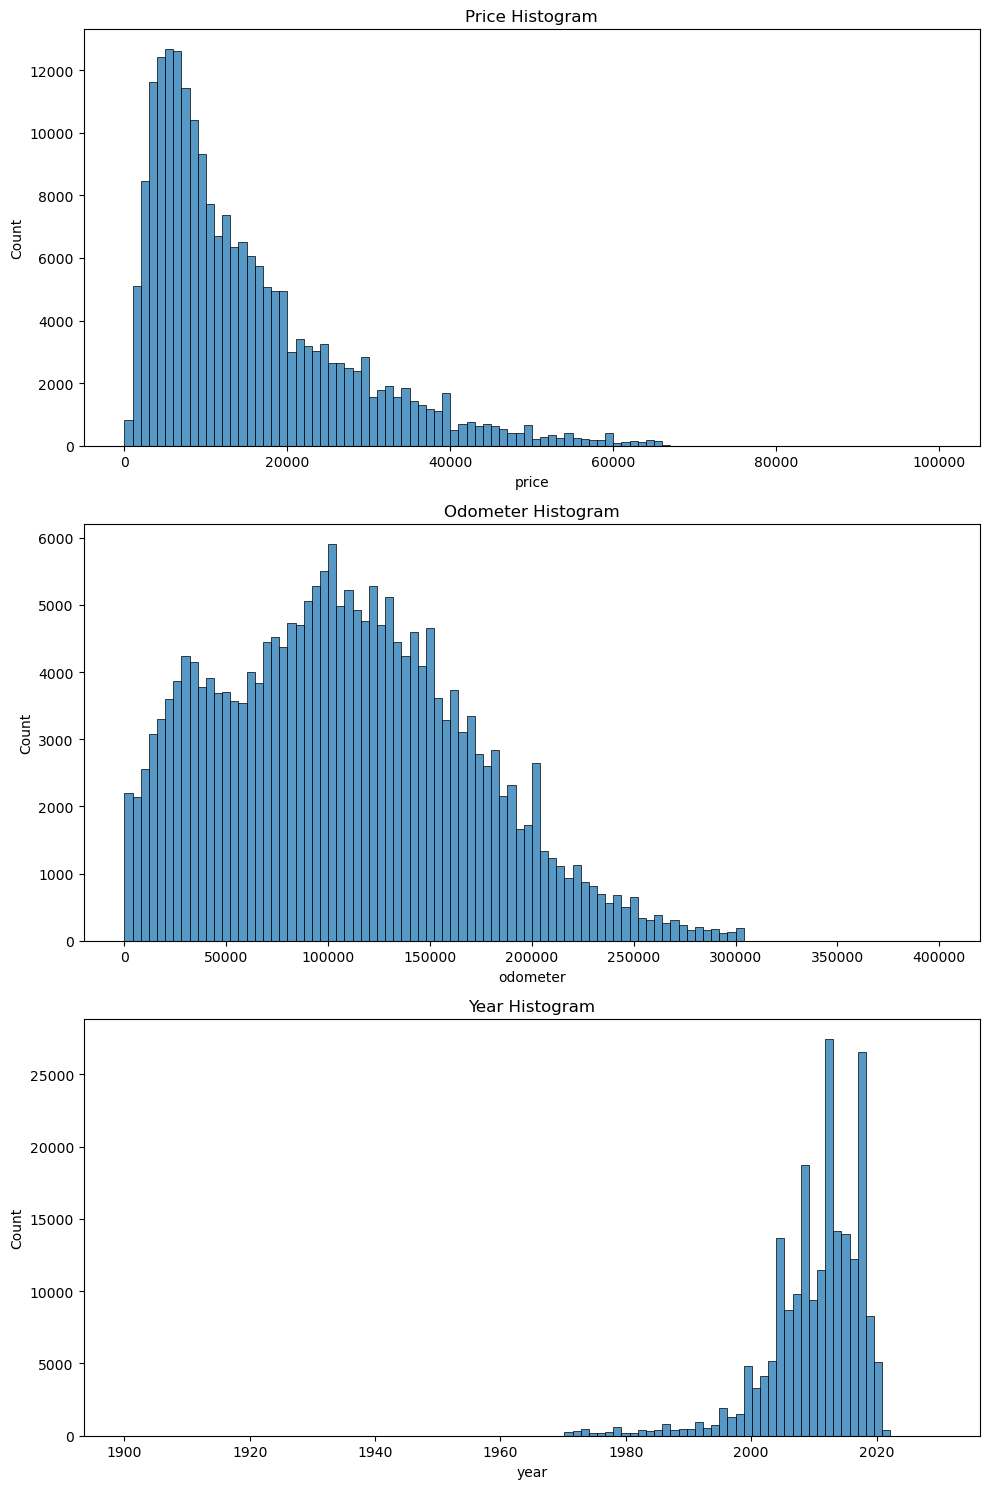

In [28]:
# Create a figure with 3 subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for Price
sns.histplot(data = df_clean,  x= 'price', bins = 100, binrange =(0,100000), ax = axes[0])
axes[0].set_title('Price Histogram')

# Histogram for Odometer
sns.histplot(data = df_clean,  x= 'odometer', bins = 100, binrange =(0,400000), ax = axes[1])
axes[1].set_title('Odometer Histogram')

# Histogram for Year
sns.histplot(data = df_clean,  x= 'year', bins = 100, binrange =(1900,2030), ax = axes[2])
axes[2].set_title('Year Histogram')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### v) Apply Log Transform

After removing the outliers, the price histogram is still fairly skewed to the left.  We will apply a log transformation during the machine learning pipelines to see if this helps improve the algorithm performance. A visualization of the log transform for price is below, and it appears to help normalization of the data, which may be useful for our models.

In [29]:
df_clean['price_log'] = np.log(df_clean['price'])

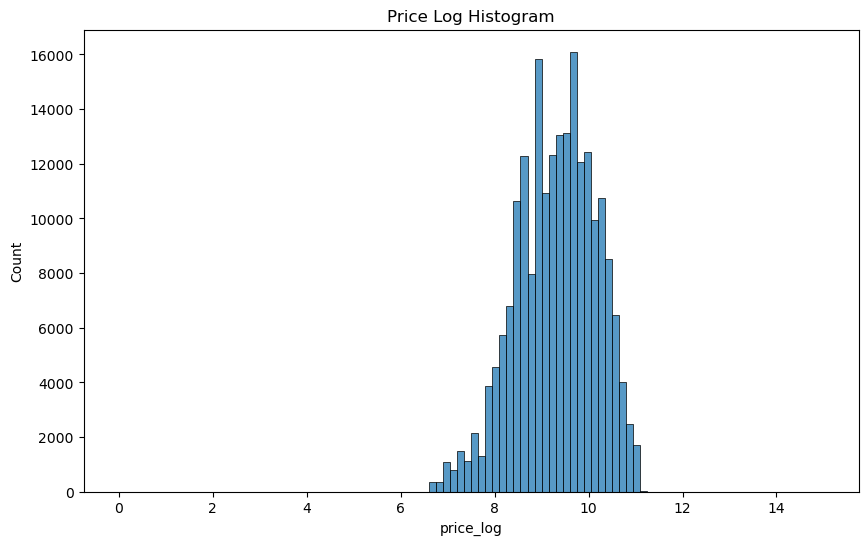

In [30]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Histogram for Price
sns.histplot(data = df_clean,  x= 'price_log', bins = 100, binrange =(0,15), ax = axes)
axes.set_title('Price Log Histogram')

plt.show()

#### vi) Remove zero values

The code below displays the unique categories for each column that has NaN values.  We will scan this information to get more insight into the non-null values in each category, to see if we should keep or remove them:

In [31]:
# List all of the unique values per column along with their percentage (to 2 decimal places)
# Only for columns that have NaN values

# Step 1: Create a list of column names
col_names = df_clean.columns.tolist()

# Step 2: List unique values and their percentage for each column that has NaN values
for col in col_names:
    # Check if the column contains any NaN values
    if df_clean[col].isna().any():
        # Use value_counts with normalize=True to get percentages, include NaN values
        unique_values_percentage = df_clean[col].value_counts(normalize=True, dropna=False) * 100

        # Round percentages to 2 decimal places
        unique_values_percentage = unique_values_percentage.round(2)

        # Convert to DataFrame for nicer printing
        print_unique_values = pd.DataFrame(unique_values_percentage).reset_index()
        print_unique_values.columns = [col, '% of Category']

        print(f"Unique Values for {col}:\n", print_unique_values, '\n\n')


Unique Values for manufacturer:
        manufacturer  % of Category
0              ford             16
1         chevrolet             13
2            toyota              9
3             honda              6
4            nissan              5
5              jeep              5
6               gmc              4
7               ram              3
8               NaN              3
9               bmw              3
10            dodge              3
11           subaru              3
12    mercedes-benz              3
13          hyundai              3
14       volkswagen              2
15              kia              2
16            lexus              2
17         chrysler              2
18         cadillac              2
19             audi              2
20            mazda              1
21            buick              1
22            acura              1
23         infiniti              1
24          lincoln              1
25            volvo              1
26          pontiac   

We can also summarize the percentage of null values in each column, as shown below:

In [32]:
#Reset # of decimal points displayed in the code:
pd.set_option('display.float_format', '{:.1f}'.format)

#Review how many null value counts have to be replaced or removed as a percentage
null_percentage = pd.DataFrame(df_clean.isnull().sum() / len(df_clean)*100)
null_percentage.columns = ['% Empty Data']
null_percentage.index.name = 'Category'
print(null_percentage)

              % Empty Data
Category                  
price                  0.0
year                   0.0
manufacturer           3.3
condition             37.1
cylinders             34.1
fuel                   0.6
odometer               0.0
title_status           1.4
transmission           0.4
drive                 27.3
size                  62.9
type                  24.5
paint_color           27.5
state                  0.0
price_log              0.0


All the categories listed above seem to have significant empty NaN values, and are all items of interest.  These are all categories that are of high importance for valuing a car, such as car condition (37% missing data), and size (62% missing data). For our first pass at analysis, we will replace these NaN values with 'Unknown' as a category, to see if it turns out to be an important feature for predicting car price.

In this case, it would be worth gathering this unknown information as inputs to a new model to improve model performance and accuracy.

For simplicity, I'll keep anything > 5% missing, and drop null values if they are < 1% of the remaining dataset.

In [33]:
#List categories where we want to replace NaN with unknown (>1% missing data)
col_replaceNaN = ['condition',
 'cylinders',
 'drive',
 'size',
 'type',
 'paint_color']

In [34]:
#Replace 'NaN' empty values in these columns with 'Unknown'
df_clean.loc[:,col_replaceNaN]=df_clean.loc[:,col_replaceNaN].fillna('unknown')

Let's check that we have removed the correct columns:

In [35]:
df_clean.isnull().sum()

Category
price              0
year               0
manufacturer    7032
condition          0
cylinders          0
fuel            1163
odometer           0
title_status    2939
transmission     762
drive              0
size               0
type               0
paint_color        0
state              0
price_log          0
dtype: int64

Now we will drop the null values for the remaining columns:

In [36]:
df_clean = df_clean.dropna()

In [37]:
df_clean.isnull().sum()

Category
price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
price_log       0
dtype: int64

#### vii) Reset Index

In [38]:
df_clean = df_clean.reset_index(drop=True)

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198439 entries, 0 to 198438
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         198439 non-null  int64  
 1   year          198439 non-null  float64
 2   manufacturer  198439 non-null  object 
 3   condition     198439 non-null  object 
 4   cylinders     198439 non-null  object 
 5   fuel          198439 non-null  object 
 6   odometer      198439 non-null  float64
 7   title_status  198439 non-null  object 
 8   transmission  198439 non-null  object 
 9   drive         198439 non-null  object 
 10  size          198439 non-null  object 
 11  type          198439 non-null  object 
 12  paint_color   198439 non-null  object 
 13  state         198439 non-null  object 
 14  price_log     198439 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 22.7+ MB


In [40]:
original_df_length = len(df)
clean_df_length = len(df_clean)
change =  (original_df_length -clean_df_length)/original_df_length*100

In [41]:
display(Markdown(f'After these cleaning activities, we have reduced our dataset from {original_df_length:,.0f} entries to {clean_df_length:,.0f} which is a {change:,.0f}% reduction.'))

After these cleaning activities, we have reduced our dataset from 426,880 entries to 198,439 which is a 54% reduction.

## Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Methodology
1. Build a column transform to encode object data into numerical, to be used in the model pipelines further down in the process.

2. Split dataset into X/y, Train/test, using the default 75/25 ratio.  

3. Establish a baseline using the mean - the model should perform better than this extremely simple metric

4. Train and tune various models
  - Select a range of hyperparameters relevant to each model
  - Run each type of model through GridSearchCV.  This will select the optimal  hyperparameter that has the best average R2 score over its cross validations (we will use the default cross validation method of k-fold = 5).
  
5. Test the best performing models on unseen data (X_train)
  - Record scoring metrics
  - Collate all scores

6. Compare best model performances un unseen data
  - Select best model based on highest R2 score

### i) Create Column Transformer to Encode Categorical Data to Numerical

In order to be processed by machine learning algorithms, we need to encode object data into numerical data.  

Categories with inherent numerical order will be coded with an Ordinal Encoder.

Categories with no inherent numerical order will be coded with a One Hot Encoder.

In [42]:
#Define categories to be ordinally encoded:
oe_columns = ['condition','cylinders','size']
#Define numerical order for the unique values within these categories:
category_orders = [['salvage','fair','good','unknown','excellent','like new','new'],
                   ['3 cylinders','4 cylinders','5 cylinders','6 cylinders','unknown','8 cylinders', '10 cylinders', '12 cylinders','other'],
                   ['sub-compact','compact','unknown','mid-size','full-size']]

#Define categories to be one hot encoded:
ohe_columns = ['manufacturer','fuel','title_status','transmission','drive','type','paint_color','state']


#Define remaining numeric columns:
numeric_columns = ['odometer','year']

#Create column transformer:
col_transformer = make_column_transformer((OneHotEncoder(sparse = False, drop='first'), ohe_columns),
                                          (OrdinalEncoder(categories = category_orders), oe_columns),
                                          (StandardScaler(), numeric_columns),
                                          remainder = 'passthrough')


### ii) Create X and y matrices for testing and training

In [43]:
X = df_clean.drop(['price', 'price_log'], axis = 1)
y = df_clean['price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

### iii) Establish baseline model

Our baseline is simply taken as the mean squared error (MSE) loss that is experienced when the testing dataset of prices is compared to the average value of the training dataset of prices.  

This yields an MSE of 143,248,631, as calculated below.  Our models should perform better and yield a lower loss than this rudimentary calculation.

In [45]:
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()

mse_baseline_train = mean_squared_error(baseline_train, y_train)
mse_baseline_test = mean_squared_error(baseline_test, y_test)

print(f'Baseline for training data: {mse_baseline_train: 0.3f}')
print(f'Baseline for testing data: {mse_baseline_test: 0.3f}')

Baseline for training data:  143251464.566
Baseline for testing data:  143248631.757


### iv) Train Models 

First we will assign a dataframe to collect results of each model

In [46]:
results_df = pd.DataFrame(columns = ['Model', 'Train Duration', 'Train MSE', 'Test MSE', 'Train MAE','Test MAE','Train R2 Score', 'Test R2 Score'])
results_df

,Model,Train Duration,Train MSE,Test MSE,Train MAE,Test MAE,Train R2 Score,Test R2 Score


Next we will train several different types of models, as described in the methodology section above.

#### A: Logistic Regression

In [47]:
#Create pipeline to transform data and train model
lr_pipe = Pipeline([('transformer',col_transformer),
                    ('lr', LinearRegression()) ])

#Define parameters for Grid Search
lr_params = {'lr__fit_intercept': [True, False]}

#Define Grid
lr_grid = GridSearchCV(estimator = lr_pipe,
                       param_grid = lr_params,
                       scoring = 'r2')

#Fit Model
lr_start_time = time.time()
lr_grid.fit(X_train, y_train)
lr_duration = time.time() - lr_start_time

#Select best estimator to make predictions
lr_best = lr_grid.best_estimator_
y_pred_test = lr_best.predict(X_test)
y_pred_train = lr_best.predict(X_train)

#Score best estimator on training data
lr_train_mse = mean_squared_error(y_train, y_pred_train)
lr_train_mae = mean_absolute_error(y_train, y_pred_train)
lr_train_r2 = r2_score(y_train, y_pred_train)
lr_train_rmse = np.sqrt(lr_train_mse)  # RMSE is the square root of MSE

#Score best estimator on test data
lr_test_mse = mean_squared_error(y_test, y_pred_test)
lr_test_mae = mean_absolute_error(y_test, y_pred_test)
lr_test_r2 = r2_score(y_test, y_pred_test)
lr_test_rmse = np.sqrt(lr_test_mse)

#Display Best Parameter
lr_params = lr_grid.best_params_
lr_params

{'lr__fit_intercept': True}

In [48]:
#Change dataframe display to 3 decimals
pd.set_option('display.float_format', '{:.3f}'.format)

#Collate results
lr_report = {
    'Model': 'Linear Regression',
    'Train Duration': lr_duration,
    'Train MSE': lr_train_mse,
    'Test MSE': lr_test_mse,
    'Train MAE': lr_train_mae,
    'Test MAE': lr_test_mae,
    'Train R2 Score': lr_train_r2,
    'Test R2 Score':lr_test_r2}


#Apppend results to main dataframe
lr_report = pd.DataFrame([lr_report])
results_df = pd.concat([results_df, lr_report], ignore_index=True).round(3)
results_df

,Model,Train Duration,Train MSE,Test MSE,Train MAE,Test MAE,Train R2 Score,Test R2 Score
0,Linear Regression,8.436,47170193.029,47448031.529,4922.388,4923.416,0.671,0.669


#### B: Ridge Regression

In [49]:
#Create pipeline to transform data and train model
ridge_pipe = Pipeline([('transformer',col_transformer),
                    ('ridge', Ridge()) ])

#Define parameters for Grid Search
ridge_params = {'ridge__alpha': np.logspace(-5,3,9)}

#Define Grid
ridge_grid = GridSearchCV(estimator = ridge_pipe,
                       param_grid = ridge_params,
                       scoring = 'r2')

#Fit Model
ridge_start_time = time.time()
ridge_grid.fit(X_train, y_train)
ridge_duration = time.time() - ridge_start_time

#Select best estimator to make predictions
ridge_best = ridge_grid.best_estimator_
y_pred_test = ridge_best.predict(X_test)
y_pred_train = ridge_best.predict(X_train)

#Score best estimator on training data
ridge_train_mse = mean_squared_error(y_train, y_pred_train)
ridge_train_mae = mean_absolute_error(y_train, y_pred_train)
ridge_train_r2 = r2_score(y_train, y_pred_train)
ridge_train_rmse = np.sqrt(ridge_train_mse)  # RMSE is the square root of MSE

#Score best estimator on test data
ridge_test_mse = mean_squared_error(y_test, y_pred_test)
ridge_test_mae = mean_absolute_error(y_test, y_pred_test)
ridge_test_r2 = r2_score(y_test, y_pred_test)
ridge_test_rmse = np.sqrt(ridge_test_mse)

#Display Best Parameter
ridge_params = ridge_grid.best_params_
ridge_params

{'ridge__alpha': 1e-05}

In [50]:
#Change dataframe display to 3 decimals
pd.set_option('display.float_format', '{:.3f}'.format)

#Collate results
ridge_report = {
    'Model': 'Ridge Regression',
    'Train Duration': ridge_duration,
    'Train MSE': ridge_train_mse,
    'Test MSE': ridge_test_mse,
    'Train MAE': ridge_train_mae,
    'Test MAE': ridge_test_mae,
    'Train R2 Score': ridge_train_r2,
    'Test R2 Score':ridge_test_r2}


#Apppend results to main dataframe
ridge_report = pd.DataFrame([ridge_report])
results_df = pd.concat([results_df, ridge_report], ignore_index=True).round(3)
results_df

,Model,Train Duration,Train MSE,Test MSE,Train MAE,Test MAE,Train R2 Score,Test R2 Score
0,Linear Regression,8.436,47170193.029,47448031.529,4922.388,4923.416,0.671,0.669
1,Ridge Regression,24.307,47170193.029,47448031.445,4922.388,4923.416,0.671,0.669


#### C: Sequential Feature Selector with Linear Regression

In [51]:
#Create pipeline to transform data and train model
sel_pipe = Pipeline([('transformer',col_transformer),
                     ('selector', SequentialFeatureSelector(estimator = LinearRegression())),
                     ('model', LinearRegression())
                         ])

#Define parameters for Grid Search
sel_params = {'selector__n_features_to_select':[3,4,5]}

#Define Grid
sel_grid = GridSearchCV(estimator = sel_pipe,
                       param_grid = sel_params,
                       scoring = 'r2')

#Fit Model
sel_start_time = time.time()
sel_grid.fit(X_train, y_train)
sel_duration = time.time() - sel_start_time

#Select best estimator to make predictions
sel_best = sel_grid.best_estimator_
y_pred_test = sel_best.predict(X_test)
y_pred_train = sel_best.predict(X_train)

#Score best estimator on training data
sel_train_mse = mean_squared_error(y_train, y_pred_train)
sel_train_mae = mean_absolute_error(y_train, y_pred_train)
sel_train_r2 = r2_score(y_train, y_pred_train)
sel_train_rmse = np.sqrt(sel_train_mse)  # RMSE is the square root of MSE

#Score best estimator on test data
sel_test_mse = mean_squared_error(y_test, y_pred_test)
sel_test_mae = mean_absolute_error(y_test, y_pred_test)
sel_test_r2 = r2_score(y_test, y_pred_test)
sel_test_rmse = np.sqrt(sel_test_mse)

#Display Best Parameter
sel_params = sel_grid.best_params_
sel_params

{'selector__n_features_to_select': 3}

In [52]:
#Change dataframe display to 3 decimals
pd.set_option('display.float_format', '{:.3f}'.format)

#Collate results
sel_report = {
    'Model': 'Sequential Features',
    'Train Duration': sel_duration,
    'Train MSE': sel_train_mse,
    'Test MSE': sel_test_mse,
    'Train MAE': sel_train_mae,
    'Test MAE': sel_test_mae,
    'Train R2 Score': sel_train_r2,
    'Test R2 Score':sel_test_r2}


#Apppend results to main dataframe
sel_report = pd.DataFrame([sel_report])
results_df = pd.concat([results_df, sel_report], ignore_index=True).round(3)
results_df

,Model,Train Duration,Train MSE,Test MSE,Train MAE,Test MAE,Train R2 Score,Test R2 Score
0,Linear Regression,8.436,47170193.029,47448031.529,4922.388,4923.416,0.671,0.669
1,Ridge Regression,24.307,47170193.029,47448031.445,4922.388,4923.416,0.671,0.669
2,Sequential Features,431.415,75021076.456,75310323.353,6317.536,6311.299,0.476,0.474


#### D: Polynomial Features

In [53]:
#Create pipeline to transform data and train model
poly_pipe = Pipeline([('transformer',col_transformer),
                      ('selector', SequentialFeatureSelector(estimator = LinearRegression(), n_features_to_select = 3)),
                      ('poly', PolynomialFeatures(degree=2,include_bias=False)),
                      ('model', Ridge())
                     ])

#Define parameters for Grid Search
poly_params = {'poly__degree':[2,3,4]}

#Define Grid
poly_grid = GridSearchCV(estimator = poly_pipe,
                       param_grid = poly_params,
                       scoring = 'r2')

#Fit Model
poly_start_time = time.time()
poly_grid.fit(X_train, y_train)
poly_duration = time.time() - poly_start_time

#polyect best estimator to make predictions
poly_best = poly_grid.best_estimator_
y_pred_test = poly_best.predict(X_test)
y_pred_train = poly_best.predict(X_train)

#Score best estimator on training data
poly_train_mse = mean_squared_error(y_train, y_pred_train)
poly_train_mae = mean_absolute_error(y_train, y_pred_train)
poly_train_r2 = r2_score(y_train, y_pred_train)
poly_train_rmse = np.sqrt(poly_train_mse)  # RMSE is the square root of MSE

#Score best estimator on test data
poly_test_mse = mean_squared_error(y_test, y_pred_test)
poly_test_mae = mean_absolute_error(y_test, y_pred_test)
poly_test_r2 = r2_score(y_test, y_pred_test)
poly_test_rmse = np.sqrt(poly_test_mse)

#Display Best Parameter
poly_params = poly_grid.best_params_
poly_params

{'poly__degree': 2}

In [54]:
#Change dataframe display to 3 decimals
pd.set_option('display.float_format', '{:.3f}'.format)

#Collate results
poly_report = {
    'Model': 'Polynomial Features',
    'Train Duration': poly_duration,
    'Train MSE': poly_train_mse,
    'Test MSE': poly_test_mse,
    'Train MAE': poly_train_mae,
    'Test MAE': poly_test_mae,
    'Train R2 Score': poly_train_r2,
    'Test R2 Score':poly_test_r2}


#Apppend results to main dataframe
poly_report = pd.DataFrame([poly_report])
results_df = pd.concat([results_df, poly_report], ignore_index=True).round(3)
results_df

,Model,Train Duration,Train MSE,Test MSE,Train MAE,Test MAE,Train R2 Score,Test R2 Score
0,Linear Regression,8.436,47170193.029,47448031.529,4922.388,4923.416,0.671,0.669
1,Ridge Regression,24.307,47170193.029,47448031.445,4922.388,4923.416,0.671,0.669
2,Sequential Features,431.415,75021076.456,75310323.353,6317.536,6311.299,0.476,0.474
3,Polynomial Features,285.870,62319118.706,62592898.446,5448.588,5434.150,0.565,0.563


## Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Our best model is selected based on the highest R2 score.  An ideal R2 is 1, which means that the model perfectly explains all the variance in the target variable.

We can see from our summary table that Linear and Ridge Regression models performed the best, with the highest R2 score of 0.669, meaning that approximately 67% of the variance in the target variable (price) was explained by our model.

Ridge performed exactly the same as Linear, since the optimal hyperparameter that was selected by GridSearchCV was alpha = 10^-5, meaning that the regularization term was so small it was basically cancelled out, and the model hence behaves very similarly to Linear Regression.

In terms of how the Linear Regression model improved against our baseline, with a smaller Mean Squared Error (MSE) of 47,448,031 which is approximately 67% reduction compared to the baseline MSE of 143,248,631. 

The sequential feature selection and polynomial feature transformation models performed significantly worse with a 0.474 and 0.563 R2 score respectively, indicating that a simpler linear model that takes into account all cleaned parameters is a better estimator of price than a reduced selection of transformed features.  However, as the R2 score is still well below the perfect score '1', there is further investigation and tuning work to be done.

Due to time constraints, we will proceed with our Linear Regression model as the best performing for now, and review which of the features within this model were weighted with highest importance by reviewing Permutation Importance Score for our features.

In [59]:
# Calculate permutation feature importance
perm_importance = permutation_importance(lr_best, X_test, y_test, n_repeats=30, random_state=42)

# Create a DataFrame to store feature importance results
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean,
    'Std Deviation': perm_importance.importances_std
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance,Std Deviation
5,odometer,0.370,0.003
0,year,0.250,0.002
4,fuel,0.074,0.001
1,manufacturer,0.061,0.001
8,drive,0.059,0.001
10,type,0.056,0.001
3,cylinders,0.029,0.001
12,state,0.022,0.001
6,title_status,0.011,0.000
7,transmission,0.004,0.000


Here we see that the top two most influential features are odometer and year, which makes sense as these are typical considerations for buyers when selecting a car.

After these two, a certain magnitude lower importance was fuel type, then manufacturer and type of car.

To deep dive some of the exact features effect on price, we can review the largest and smallest coefficient values for the linear regression model.

In [60]:
#Extract model feature names after the column transformer is applied
feature_names = lr_best.named_steps['transformer'].get_feature_names_out() 
# Remove prefixes from feature names
cleaned_feature_names = [name.split('__')[-1] for name in feature_names]

#Extract best linear regression coefficeints:
lr_coefs = lr_best.named_steps['lr'].coef_

#Print coefficients for each feature
coef_df = pd.DataFrame({'Feature': cleaned_feature_names,
                        'LinReg Coefficient': lr_coefs})

coef_df = coef_df.sort_values(by = 'LinReg Coefficient', ascending = False);

In [61]:
#Print the top 10 coefficients
coef_df.head(20)

,Feature,LinReg Coefficient
37,manufacturer_tesla,18457.753
8,manufacturer_datsun,14648.727
1,manufacturer_aston-martin,11276.243
32,manufacturer_porsche,9098.094
10,manufacturer_ferrari,5249.238
62,type_pickup,4675.565
64,type_truck,4363.256
134,year,4249.293
34,manufacturer_rover,3848.024
60,type_offroad,3507.938


In [62]:
coef_df.tail(20)

,Feature,LinReg Coefficient
98,state_ma,-4281.357
109,state_nh,-4355.253
48,title_status_rebuilt,-4384.083
30,manufacturer_nissan,-4466.612
113,state_ny,-4533.551
16,manufacturer_hyundai,-4645.125
49,title_status_salvage,-4692.430
27,manufacturer_mini,-4791.004
52,drive_fwd,-5033.799
133,odometer,-5149.203


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Please see README for the report to clients